<h1>KRUSKAL'S ALGORITHM</h1>

Kruskal's Algorithm For Undirected Graphs

1. Input 1 - Undirected Graph
2. Input 2 - Undirected Graph
3. Input 3 - Undirected Graph
4. Input 4 - Undirected Graph
Please Choose an Input : 2
Edge Added : GI = 5
Edge Added : AB = 6
Edge Added : EI = 7
Edge Added : BD = 8
Edge Considered But not Added : EG = 9
Edge Added : IJ = 10
Edge Added : HJ = 11
Edge Considered But not Added : HI = 12
Edge Added : AF = 13
Edge Added : DE = 14
Edge Added : CG = 15

The Edges in the Minimum Spanning Tree are
For Edge From G ------> I , The Path Cost is = 5


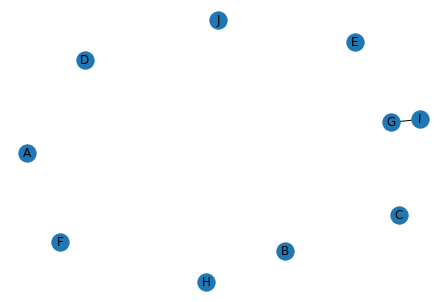

For Edge From A ------> B , The Path Cost is = 6


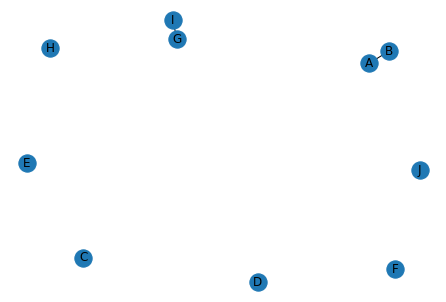

For Edge From E ------> I , The Path Cost is = 7


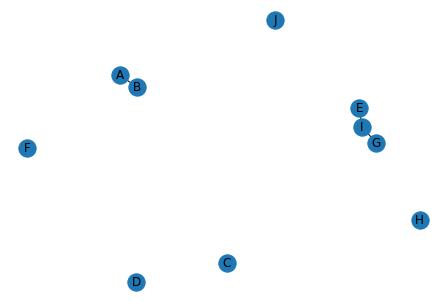

For Edge From B ------> D , The Path Cost is = 8


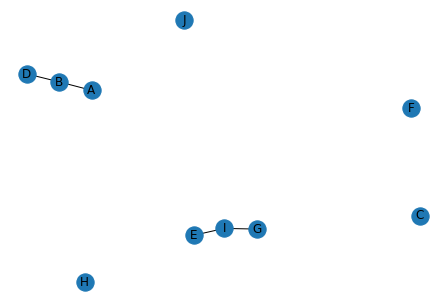

For Edge From I ------> J , The Path Cost is = 10


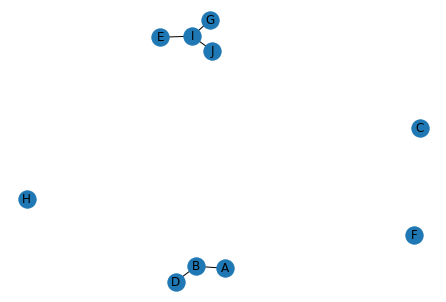

For Edge From H ------> J , The Path Cost is = 11


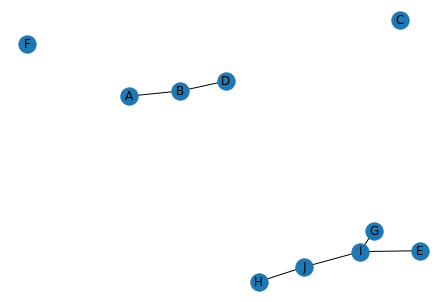

For Edge From A ------> F , The Path Cost is = 13


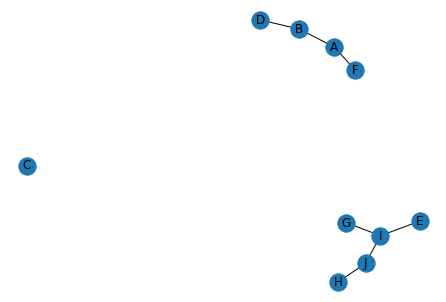

For Edge From D ------> E , The Path Cost is = 14


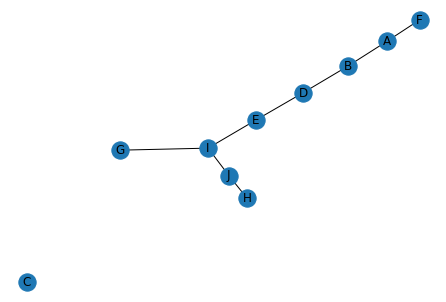

For Edge From C ------> G , The Path Cost is = 15


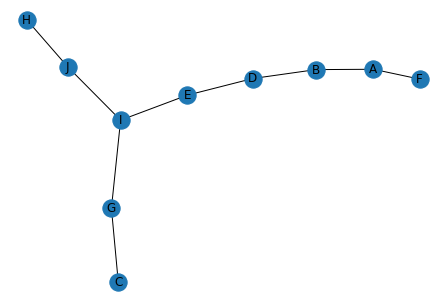

So The Minimum Spanning Tree Has a Cost of 89


So The Total Execution Time in Nano Seconds = 2400000.0


In [1]:
import math
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import timeit as time

print('Kruskal\'s Algorithm For Undirected Graphs\n')
print('1. Input 1 - Undirected Graph')
print('2. Input 2 - Undirected Graph')
print('3. Input 3 - Undirected Graph')
print('4. Input 4 - Undirected Graph')

input_selection = int(input('Please Choose an Input : '))
if input_selection==1:
    file_name='Input1_UndirectedGraph.txt'
elif input_selection==2:
    file_name='i1.txt'
elif input_selection==3:
    file_name='Input3_UndirectedGraph.txt'
elif input_selection==4:
    file_name='Input4_UndirectedGraph.txt'
else:
    print('\nPlease Enter a Valid Input')

f = open(file_name, "r")

data = [x.split() for x in f]

#information on number of vertices,edges and whether graph is directed or not
no_of_vertices = int(data[0][0])
no_of_edges = int(data[0][1])
directed = data[0][2]!='U'

#checking if source is given in the text file and rewriting data accordingly
if len(data[-1])==1 :
    source = ''.join(data[-1])
    data=data[1:-1]
else:
    source = None
    data=data[1:]


#Functions for Graph Visualisation    
def DrawGraph(from_vertices,to_vertices):
    
    # Build a dataframe with 4 connections
    df = pd.DataFrame({ 'from':from_vertices, 'to':to_vertices})

    # Build your graph
    G=nx.from_pandas_edgelist(df, 'from', 'to')

    # Plot it
    nx.draw(G, with_labels=True)
    plt.show()

def PreProcess(drawedge):
    if drawedge==None:
        DrawGraph(vertices,vertices)
    else:
        for i in range(len(vertices)):
            fullstring = drawedge
            substring = vertices[i]
            try:
                index = fullstring.index(substring)
            except ValueError:
                ___
                #print ("Not found!")
            else:
                vertices.append(drawedge[index])
                if index==0:
                    index=1
                else:
                    index=0
                to.append(drawedge[index])
        DrawGraph(vertices,to)

#storing data into dictionary
vertices = dict()
def getAllNodePaths(data):
    d = dict()
    for i in data:
        vertices[i[0]]=True
        vertices[i[1]]=True
        node= i[0]+i[1]
        if d.get(node,None)!=None:
            d[node]+=int(i[2])
        else:
            d[node]=int(i[2])
    return d

d = getAllNodePaths(data)
d = dict(sorted(d.items(), key=lambda item: item[1])) #sorted dictionary according to values
V=vertices
to  = [k for k,v in vertices.items()]
vertices =[k for k,v in vertices.items()]

#storing Alphabetical nodes as integers into a hash table
d1=dict()
d2=dict()
for i,v in enumerate(sorted(set(vertices))):
    d1[v]=i
    d2[i]=v

class Kruskals:
 
    def __init__(self, vertices):
        self.SET = vertices  # The Total Number of Vertices
        self.graph = []  #inorder to store graph
 
    # function to add an edge to graph
    def addEdge(self, start, end, w):
        self.graph.append([start, end, w])
 
    def search_for_parent(self, parent, i):
        if parent[i] == i:
            return i
        return self.search_for_parent(parent, parent[i])
 
    def combine(self, parent, position, x, y):
        r_x = self.search_for_parent(parent, x)
        r_y = self.search_for_parent(parent, y)
        if position[r_x] < position[r_y]:
            parent[r_x] = r_y
        elif position[r_x] > position[r_y]:
            parent[r_y] = r_x
        else:
            parent[r_y] = r_x
            position[r_x] += 1
 
    # The main function to construct M using Kruskal's algorithm
    def KruskalsAlgorithm(self):
        
        final_res = []  # This will store the resultant MST
        i = 0
        no_edges = 0
        self.graph = sorted(self.graph,
                            key=lambda item: item[2])
        parent = []
        position = []
 
        for node in range(self.SET):
            parent.append(node)
            position.append(0)
 
        while no_edges < self.SET - 1:
            start, end, w = self.graph[i]
            
            i = i + 1
            x = self.search_for_parent(parent, start)
            y = self.search_for_parent(parent, end)
            if x != y:
                no_edges = no_edges + 1
                final_res.append([start, end, w])
                self.combine(parent, position, x, y)
                print("Edge Added : {} = {}".format(d2[start]+d2[end],w))
            else:
                print("Edge Considered But not Added : {} = {}".format(d2[start]+d2[end],w))
        min_cost = 0
        print ("\nThe Edges in the Minimum Spanning Tree are")
        for start, end, weight in final_res:
            min_cost += weight
            print("For Edge From {} ------> {} , The Path Cost is = {}".format(d2[start], d2[end], weight))
            loss_time_start=time.default_timer()
            PreProcess(d2[start]+d2[end])
            loss_time_end=time.default_timer()
            global lost_time
            lost_time+=(loss_time_end-loss_time_start)
        print("So The Minimum Spanning Tree Has a Cost of {}".format(min_cost));
        
g=Kruskals(len(d1))
for k,val in d.items():
    g.addEdge(int(d1[k[0]]),int(d1[k[-1]]),val)

lost_time=0
start_time = time.default_timer()
g.KruskalsAlgorithm()
end_time=time.default_timer()
total_time=(end_time-start_time-lost_time)*(10**9)
print('\n\nSo The Total Execution Time in Nano Seconds = {}'.format(round(total_time,1)))